<a href="https://colab.research.google.com/github/Jeonyujeong/image-classification/blob/master/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification with TensorFlow Lite Model Maker

Model Maker library simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.

This notebook shows an end-to-end example that utilizes this Model Maker library to illustrate the adaption and conversion of a commonly-used image classification model to classify flowers on a mobile device.



## Prerequisites

To run this example, we first need to install serveral required packages, including Model Maker package that in github [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

In [ ]:
!pip install tflite-model-maker

     |████████████████████████████████| 92kB 4.4MB/s 
     |████████████████████████████████| 266kB 17.7MB/s 
     |████████████████████████████████| 345.8MB 48kB/s 
     |████████████████████████████████| 942kB 26.0MB/s 
     |████████████████████████████████| 1.1MB 49.0MB/s 
     |████████████████████████████████| 81kB 12.0MB/s 
  Using cached https://files.pythonhosted.org/packages/89/e3/d576f6f02bc75bacbc3d42494e8f1d063c95617d86648dba243c2cb3963e/pybind11-2.5.0-py2.py3-none-any.whl
     |████████████████████████████████| 8.9MB 54.9MB/s 
     |████████████████████████████████| 460kB 59.8MB/s 
     |████████████████████████████████| 358kB 62.6MB/s 
     |████████████████████████████████| 36.6MB 78kB/s 
     |████████████████████████████████| 174kB 61.8MB/s 
     |████████████████████████████████| 102kB 13.7MB/s 
  Created wheel for tflite-support: filename=tflite_support-0.1.0a0-cp36-cp36m-linux_x86_64.whl size=3951971 sha256=606659ca0e41a725da816d3b483dbe2660976cf91d8fc869f7df42cb66

Import the required packages.

In [ ]:
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/RottenFruitsOSS/DataSet/raw/master/dataset_v2.0.zip

--2020-08-29 07:58:17--  https://github.com/RottenFruitsOSS/DataSet/raw/master/dataset_v2.0.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RottenFruitsOSS/DataSet/master/dataset_v2.0.zip [following]
--2020-08-29 07:58:17--  https://raw.githubusercontent.com/RottenFruitsOSS/DataSet/master/dataset_v2.0.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5811230 (5.5M) [application/zip]
Saving to: ‘dataset_v2.0.zip’

dataset_v2.0.zip    100%[===================>]   5.54M  23.2MB/s    in 0.2s    

2020-08-29 07:58:17 (23.2 MB/s) - ‘dataset_v2.0.zip’ saved [5811230/5811230]



In [ ]:
!unzip dataset_v2.0.zip

Archive:  dataset_v2.0.zip
   creating: test_classification/
   creating: test_classification/normal/
  inflating: test_classification/normal/normal_101.jpg  
  inflating: test_classification/normal/normal_102.jpg  
  inflating: test_classification/normal/normal_103.jpg  
  inflating: test_classification/normal/normal_104.jpg  
  inflating: test_classification/normal/normal_105.jpg  
  inflating: test_classification/normal/normal_106.jpg  
  inflating: test_classification/normal/normal_107.jpg  
  inflating: test_classification/normal/normal_108.jpg  
  inflating: test_classification/normal/normal_109.jpg  
  inflating: test_classification/normal/normal_110.jpg  
  inflating: test_classification/normal/normal_111.jpg  
  inflating: test_classification/normal/normal_112.jpg  
  inflating: test_classification/normal/normal_193.jpg  
  inflating: test_classification/normal/normal_194.jpg  
  inflating: test_classification/normal/normal_195.jpg  
  inflating: test_classification/normal/nor

In [ ]:
image_path = "/content/train_classification"

In [ ]:
data = ImageClassifierDataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 825, num_label: 3, labels: normal, spoiled_advanced, spoiled_early.


Split it to training data (80%), validation data (10%, optional) and testing data (10%).

In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Show 25 image examples with labels.

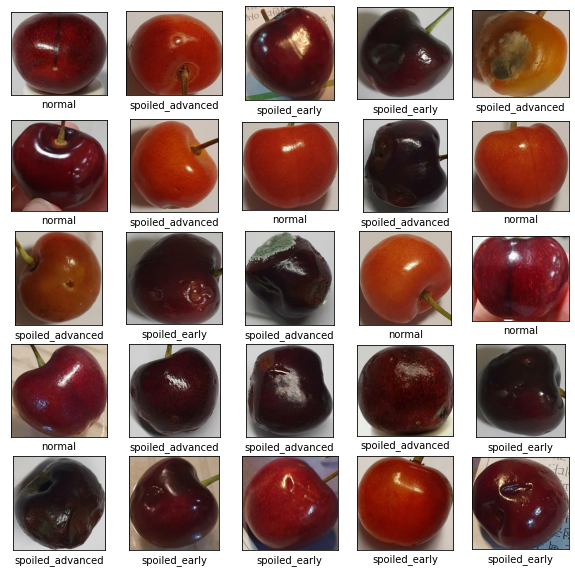

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.dataset.take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

### Step 2: Customize the TensorFlow Model

Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.


In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=500)
loss, accuracy = model.evaluate(test_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3843      
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/500
20/20 [==============================] - 28s 1s/step - loss: 1.1347 - accuracy: 0.3380 - val_loss: 0.8848 - val_accuracy: 0.6250
Epoch 2/500
20/20 [==============================] - 27s 1s/step - loss: 0.7995 - accuracy: 0.6621 - val_loss: 0.7026 - val_accuracy: 0.7656
Epoch 3/500
20/20 [==============================] - 26s 1s/step - loss: 0.7197 - a

In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=100)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/100
20/20 [==============================] - 29s 1s/step - loss: 1.1398 - accuracy: 0.4185 - val_loss: 0.8163 - val_accuracy: 0.7500
Epoch 2/100
20/20 [==============================] - 27s 1s/step - loss: 0.7731 - accuracy: 0.7063 - val_loss: 0.7104 - val_accuracy: 0.7969
Epoch 3/100
20/20 [=========================

Have a look at the detailed model structure.

In [ ]:
model.summary()

### Step 3: Evaluate the Customized Model

Evaluate the result of the model, get the loss and accuracy of the model.

In [ ]:
loss, accuracy = model.evaluate(test_data)

3/3 [==============================] - 3s 915ms/step - loss: 0.5192 - accuracy: 0.8916


We could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

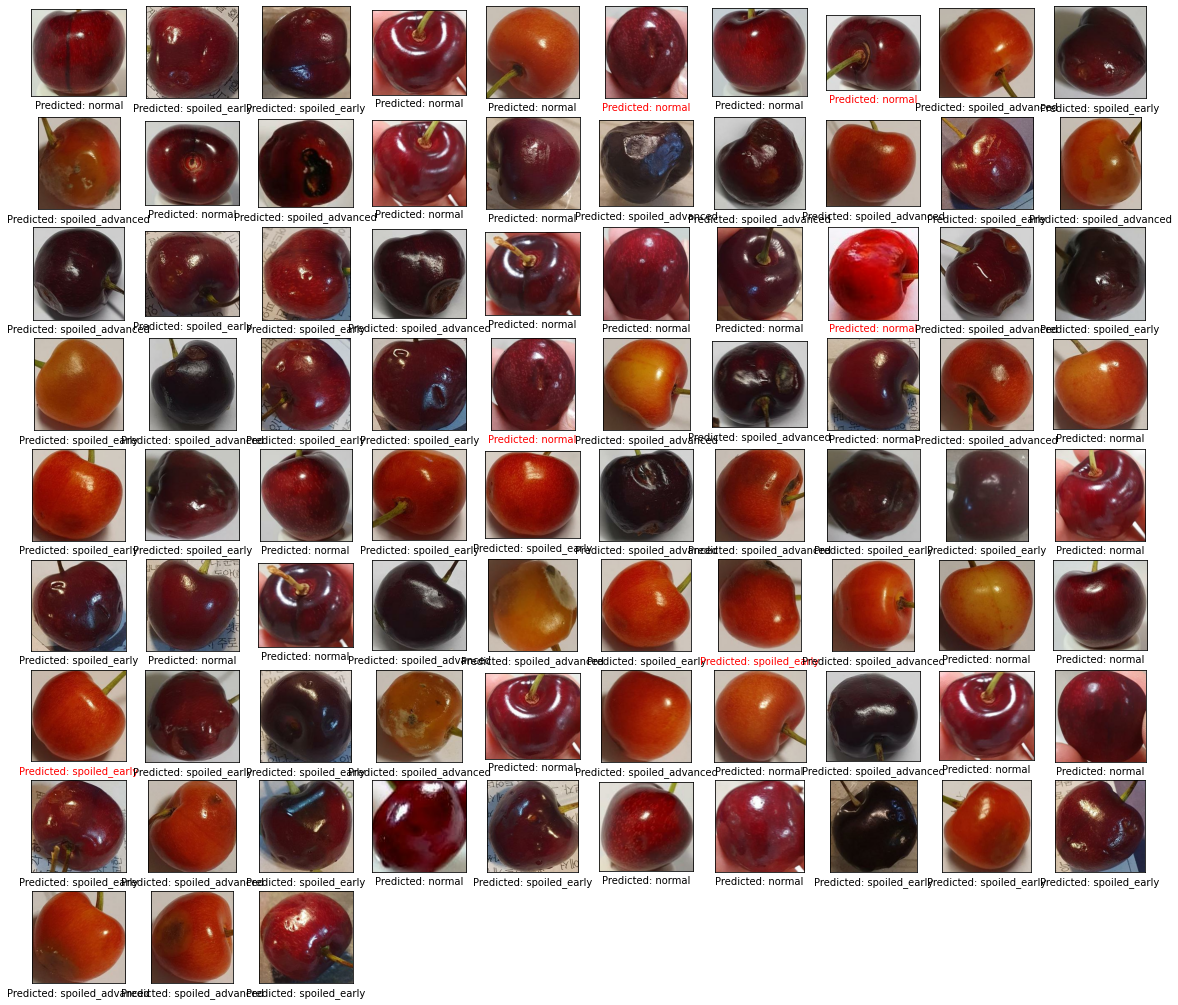

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

If the accuracy doesn't meet the app requirement, one could refer to [Advanced Usage](#scrollTo=zNDBP2qA54aK) to explore alternatives such as changing to a larger model, adjusting re-training parameters etc.

### Step 4: Export to TensorFlow Lite Model

Convert the existing model to TensorFlow Lite model format and save the image labels in label file. The default TFLite filename is `model.tflite`, the default label filename is `label.txt`.

In [ ]:
model.export(export_dir='.')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/tmp1sqon9wz/assets


INFO:tensorflow:Assets written to: /tmp/tmp1sqon9wz/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp8dmwc8h4/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmp8dmwc8h4/labels.txt.


The TensorFlow Lite model file and label file could be used in [image classification](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification) reference app.

As for android reference app as an example, we could add `flower_classifier.tflite` and `flower_label.txt` in [assets](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/android/app/src/main/assets) folder. Meanwhile, change label filename in [code](https://github.com/tensorflow/examples/blob/master/lite/examples/image_classification/android/app/src/main/java/org/tensorflow/lite/examples/classification/tflite/ClassifierFloatMobileNet.java#L65) and TensorFlow Lite file name in [code](https://github.com/tensorflow/examples/blob/master/lite/examples/image_classification/android/app/src/main/java/org/tensorflow/lite/examples/classification/tflite/ClassifierFloatMobileNet.java#L60). Thus, we could run the retrained float TensorFlow Lite model on the android app.


You can also evalute the tflite model with the `evaluate_tflite` method.

In [ ]:
model.evaluate_tflite('model.tflite', test_data)

INFO:tensorflow:Processing example: #0
[[[[0.84705883 0.8666667  0.8392157 ]
   [0.84705883 0.8666667  0.8392157 ]
   [0.84705883 0.8666667  0.8392157 ]
   ...
   [0.8352941  0.8392157  0.78431374]
   [0.8352941  0.8392157  0.78431374]
   [0.8352941  0.8392157  0.78431374]]

  [[0.85064775 0.8702556  0.8428046 ]
   [0.85064775 0.8702556  0.8428046 ]
   [0.85064775 0.8702556  0.8428046 ]
   ...
   [0.83888304 0.8428046  0.78790265]
   [0.83888304 0.8428046  0.78790265]
   [0.83888304 0.8428046  0.78790265]]

  [[0.8509804  0.87058824 0.84313726]
   [0.8509804  0.87058824 0.84313726]
   [0.8509804  0.87058824 0.84313726]
   ...
   [0.8457283  0.83988094 0.7882353 ]
   [0.8457283  0.83988094 0.7882353 ]
   [0.8457283  0.83988094 0.7882353 ]]

  ...

  [[0.8117647  0.83137256 0.8039216 ]
   [0.8117647  0.83137256 0.8039216 ]
   [0.8117647  0.83137256 0.80784315]
   ...
   [0.6509804  0.6039216  0.5568628 ]
   [0.6509804  0.6039216  0.5568628 ]
   [0.6509804  0.6039216  0.5568628 ]]

  [[0.

INFO:tensorflow:Processing example: #0
[[[[0.84705883 0.8666667  0.8392157 ]
   [0.84705883 0.8666667  0.8392157 ]
   [0.84705883 0.8666667  0.8392157 ]
   ...
   [0.8352941  0.8392157  0.78431374]
   [0.8352941  0.8392157  0.78431374]
   [0.8352941  0.8392157  0.78431374]]

  [[0.85064775 0.8702556  0.8428046 ]
   [0.85064775 0.8702556  0.8428046 ]
   [0.85064775 0.8702556  0.8428046 ]
   ...
   [0.83888304 0.8428046  0.78790265]
   [0.83888304 0.8428046  0.78790265]
   [0.83888304 0.8428046  0.78790265]]

  [[0.8509804  0.87058824 0.84313726]
   [0.8509804  0.87058824 0.84313726]
   [0.8509804  0.87058824 0.84313726]
   ...
   [0.8457283  0.83988094 0.7882353 ]
   [0.8457283  0.83988094 0.7882353 ]
   [0.8457283  0.83988094 0.7882353 ]]

  ...

  [[0.8117647  0.83137256 0.8039216 ]
   [0.8117647  0.83137256 0.8039216 ]
   [0.8117647  0.83137256 0.80784315]
   ...
   [0.6509804  0.6039216  0.5568628 ]
   [0.6509804  0.6039216  0.5568628 ]
   [0.6509804  0.6039216  0.5568628 ]]

  [[0.

{'accuracy': 0.927710843373494}

In [ ]:
from google.colab import files
try: 
  files.download("model.tflite")
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>